In [1]:
# import packages

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)             # set the number of rows to be displayed
pd.set_option('display.max_columns', 500)          # set the number of columns to be displayed
pd.set_option('display.width', 1000)               # set the width of the column columns

pd.options.display.float_format = '{:.2f}'.format  # format floats as standard notation vs. 
                                                   # scientific notation

In [2]:
# import csv and create dataframe
df = pd.read_csv('kc_house_data.csv')

# inspect dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


## Some Data Cleaning

In [5]:
# some values in the sqft_basement column were set to '?'
# I am then going to subtract sqft_above from sqft_living 
# to find the sqft_basement values

df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 3.5+ MB


In [ ]:
# None of this code was necessary. Could just subract 
# sqft above from sqft_living. Live and Learn!

# # some values in the sqft_basement column were set to '?'
# # I'm going to set the '?' to 0 in order to convert the
# # the datatype to integer. I am then going to subtract
# # sqft_above from sqft_living to find the sqft_basement 
# # values

# df['sqft_basement'].value_counts()
# df.loc[df['sqft_basement'] == '?']
# len(df[df['sqft_basement'] == '?'])

# # replace '?' with 0
# df['sqft_basement'].replace('?', 0, inplace = True) 

# # confirm replacement
# df.loc[df['sqft_basement'] == '?']

# # sqft_basement datatype is set as an object and needs to be re-typed as float
# df['sqft_basement'] = df['sqft_basement'].astype('float') 

## Handling Missing Values

In [7]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### exploring yr_renovated values

In [8]:
df['yr_renovated'].value_counts()

0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
2000.00       29
2005.00       29
1990.00       22
2004.00       22
2009.00       21
1989.00       20
2006.00       20
2002.00       17
1991.00       16
1998.00       16
1984.00       16
1999.00       15
2008.00       15
2010.00       15
2001.00       15
1983.00       15
2015.00       14
1985.00       14
1986.00       14
1987.00       14
1994.00       14
1992.00       13
1993.00       12
1997.00       12
1995.00       12
1996.00       11
1988.00       11
1970.00        9
2011.00        9
1980.00        8
1982.00        8
2012.00        8
1979.00        7
1977.00        7
1968.00        7
1975.00        5
1964.00        5
1969.00        4
1963.00        4
1973.00        4
1981.00        4
1965.00        4
1978.00        3
1960.00        3
1958.00        3
1956.00        3
1955.00        3
1945.00        3
1972.00        3
1967.00        2
1957.00        2
1940.00        2
1974.00        2
1962.00       

In [9]:
print(20853/21597*100) # percentage never renovated (year 0.0 value)
print(3842/21597*100) # percentage of null values

96.55507709404084
17.78950780200954


In [10]:
# 97% of the observations are showing that the property has never been renovated
# I'm going to assume that if a property had been renovated, that would be properly noted
# and that null values actually represent no renovation. 

# convert yr_renovated missing values to 0.0
df['yr_renovated'].fillna(0.0, inplace=True)

### exploring waterfront values

In [11]:
# I'm going to assume that if a property is waterfront, that would be properly noted
# and that null values actually represent not waterfront. 

# convert waterfront missing values to 0.0
df['waterfront'].fillna(0.0, inplace=True)

### exploring view values

In [12]:
63/21597*100   # percentage of null values in the view column

0.29170718155299347

In [13]:
# the null values in the view column only make up 0.29% of the total observations so I am going to drop those rows
df = df.dropna(axis=0, subset=['view'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null int64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 3.6+ MB


In [15]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Exploratory Data Analysis

In [ ]:
# convert date to a season
# convert waterfront to yes/no binary
# convert view to yes/no binary
# convert yr_renovated to recently/not recently binary

# convert condition below average (1,2), average (3) and above average (4,5)
# convert grade to low (1-3), average (4-10) and high (11-13)

# older than 20 years and renovated?

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

### Handling Outliers

In [17]:
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.00,33,1.75,1620,6000,1.00,0.00,0.00,5,7,1040,580,1947,0.00,98103,47.69,-122.33,1330,4700


In [18]:
# set value of 33 bedrooms to 3 for one property
df.set_value(15856, 'bedrooms', 3)

/Users/tararosen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,0.00,0.00,3,7,1180,0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0,1933,0.00,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,0.00,0.00,3,8,1530,0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,0.00,0.00,3,8,2310,0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,0.00,0.00,3,7,1020,0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,0.00,0.00,3,8,1600,0,2004,0.00,98027,47.53,-122.07,1410,1287


In [19]:
# confirm new value
df[df['id'] == 2402100895]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.00,3,1.75,1620,6000,1.00,0.00,0.00,5,7,1040,580,1947,0.00,98103,47.69,-122.33,1330,4700


### Visualizations

In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

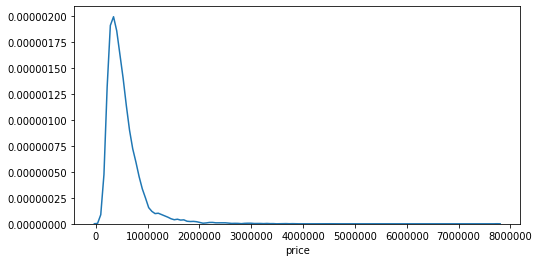

In [21]:
plt.figure(figsize=(8, 4))
sns.distplot(df['price'], rug = False, hist = False)

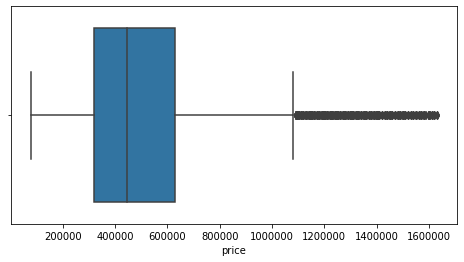

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['price'], orient = 'h')

In [23]:
# number of properties with sales prices greater than 4 million
len(df[df['price'] >= 4000000.00])

11

In [24]:
df.loc[df['price'] == 7700000.00]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.00,6,8.00,12050,27600,2.50,0.00,3.00,4,13,8570,3480,1910,1987.00,98102,47.63,-122.32,3940,8800


In [ ]:
# The price distribution shows a right skew. I can either perform a log transformation or remove higher priced
# properties that skew the data

In [25]:
# removing the higher priced properties (outliers) than are greater than or equal to 3 standard deviations 
# from the mean, which is 0.3% of the data

df = df[(np.abs(stats.zscore(df.price)) < 3)]

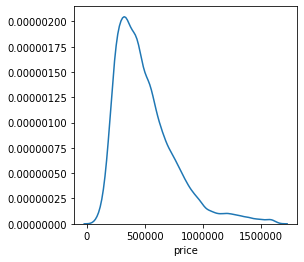

In [26]:
plt.figure(figsize=(4, 4))
sns.distplot(df['price'], rug = False, hist = False)

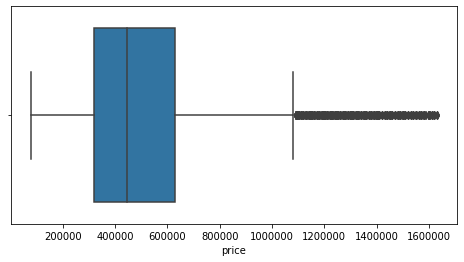

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['price'], orient = 'h')

In [28]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00,21125.00
mean,4594181403.49,506693.57,3.35,2.09,2031.76,14812.16,1.49,0.00,0.21,3.41,7.60,1751.24,280.53,1970.93,65.19,98078.28,47.56,-122.21,1959.91,12622.53
std,2878366722.51,258863.16,0.89,0.74,836.19,40360.45,0.54,0.06,0.71,0.65,1.11,771.94,424.99,29.29,354.77,53.40,0.14,0.14,655.07,27175.26
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2126049083.00,320000.00,3.00,1.50,1410.00,5003.00,1.00,0.00,0.00,3.00,7.00,1180.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1480.00,5080.00
50%,3905040780.00,446950.00,3.00,2.25,1890.00,7560.00,1.00,0.00,0.00,3.00,7.00,1540.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1820.00,7575.00
75%,7334501300.00,627000.00,4.00,2.50,2500.00,10490.00,2.00,0.00,0.00,4.00,8.00,2165.00,540.00,1996.00,0.00,98118.00,47.68,-122.12,2330.00,10000.00
max,9900000190.00,1630000.00,11.00,7.50,7480.00,1651359.00,3.50,1.00,4.00,5.00,12.00,7320.00,2850.00,2015.00,2015.00,98199.00,47.78,-121.31,5790.00,871200.00


In [ ]:
# the highest property value is now 1.63 million dollars

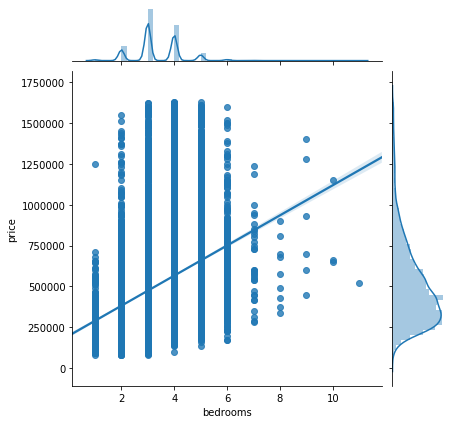

In [97]:
sns.jointplot(df['bedrooms'], 'price', data=df, kind='reg')

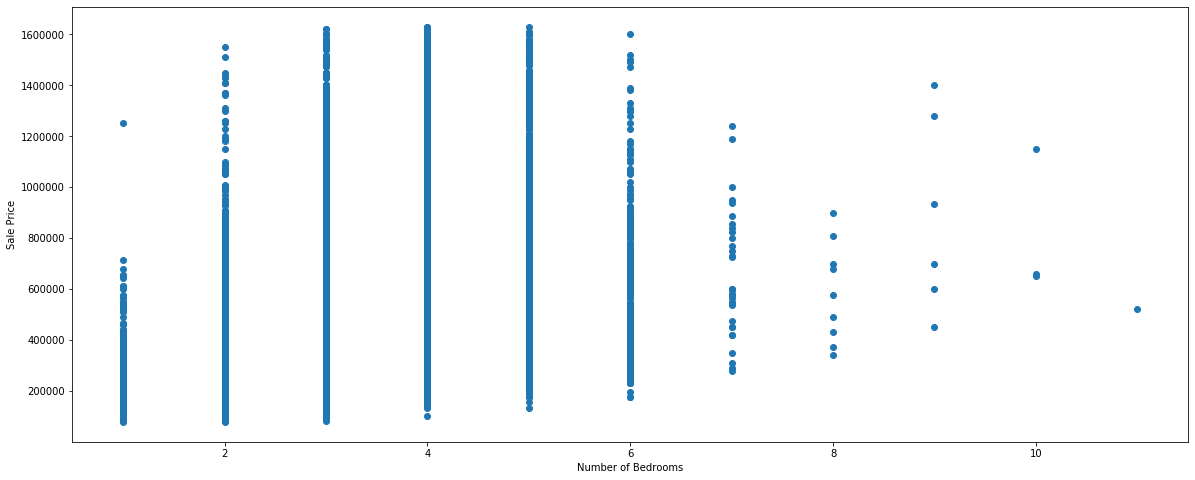

In [46]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['bedrooms'], df['price'])
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Sale Price')
plt.show()

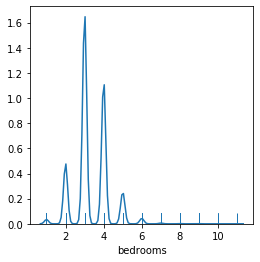

In [32]:
plt.figure(figsize=(4, 4))
sns.distplot(df['bedrooms'], rug = True, hist = False)

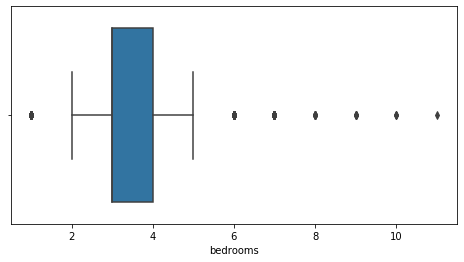

In [39]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['bedrooms'], orient = "h")

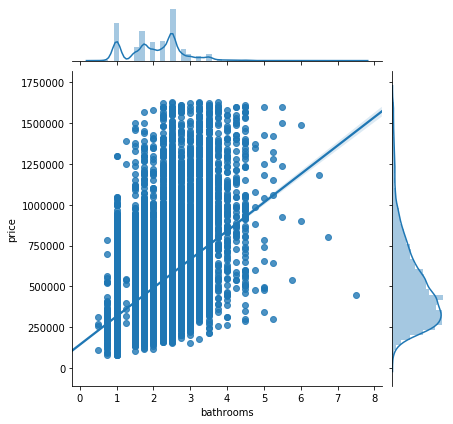

In [98]:
sns.jointplot(df['bathrooms'], 'price', data=df, kind='reg')

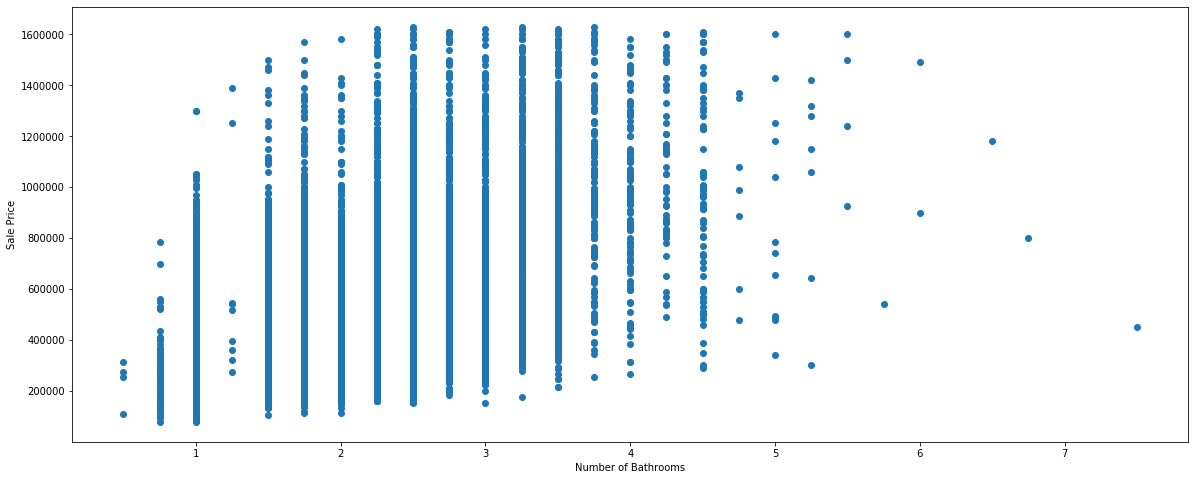

In [45]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['bathrooms'], df['price'])
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Sale Price')
plt.show()

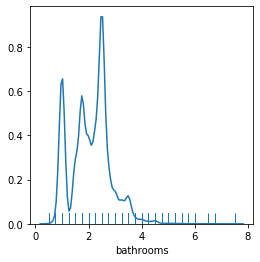

In [42]:
plt.figure(figsize=(4, 4))
sns.distplot(df['bathrooms'], rug = True, hist = False)

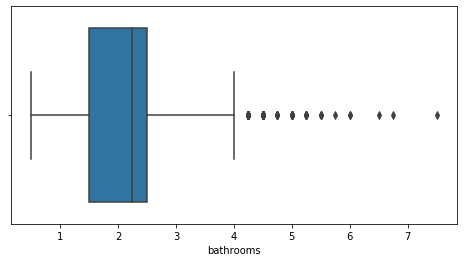

In [43]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['bathrooms'], orient = "h")

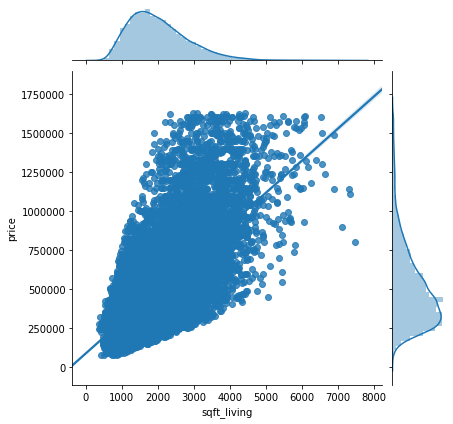

In [99]:
sns.jointplot(df['sqft_living'], 'price', data=df, kind='reg')

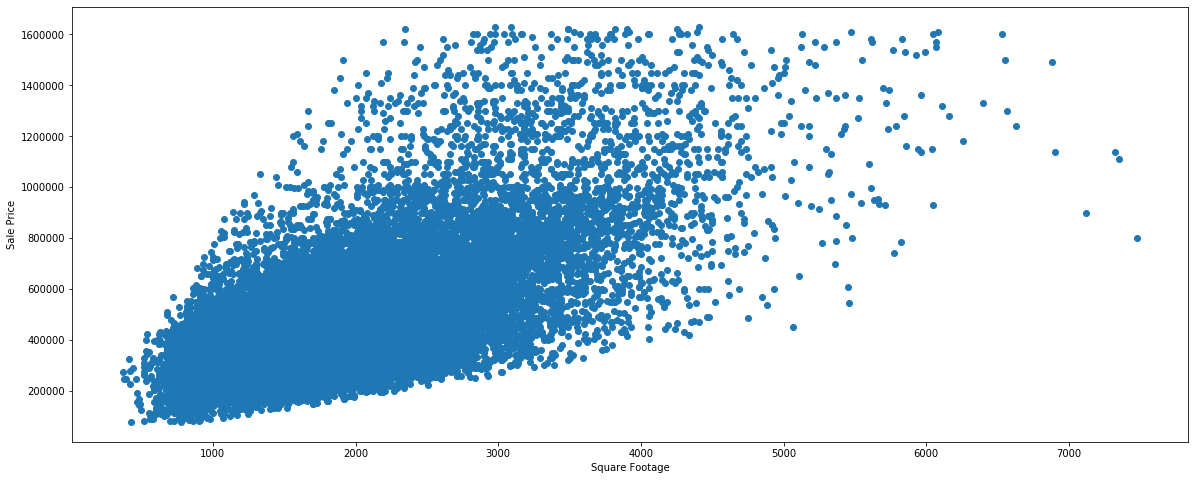

In [44]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['sqft_living'], df['price'])
ax.set_xlabel('Square Footage')
ax.set_ylabel('Sale Price')
plt.show()

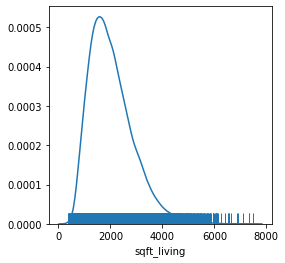

In [47]:
plt.figure(figsize=(4, 4))
sns.distplot(df['sqft_living'], rug = True, hist = False)

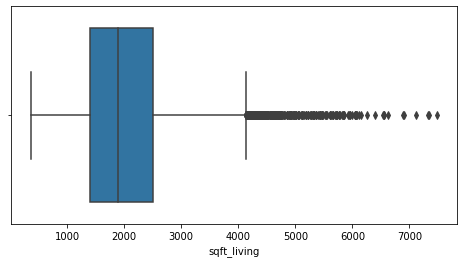

In [48]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['sqft_living'], orient = "h")

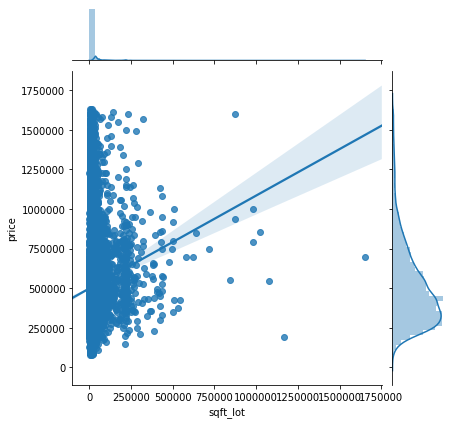

In [100]:
sns.jointplot(df['sqft_lot'], 'price', data=df, kind='reg')

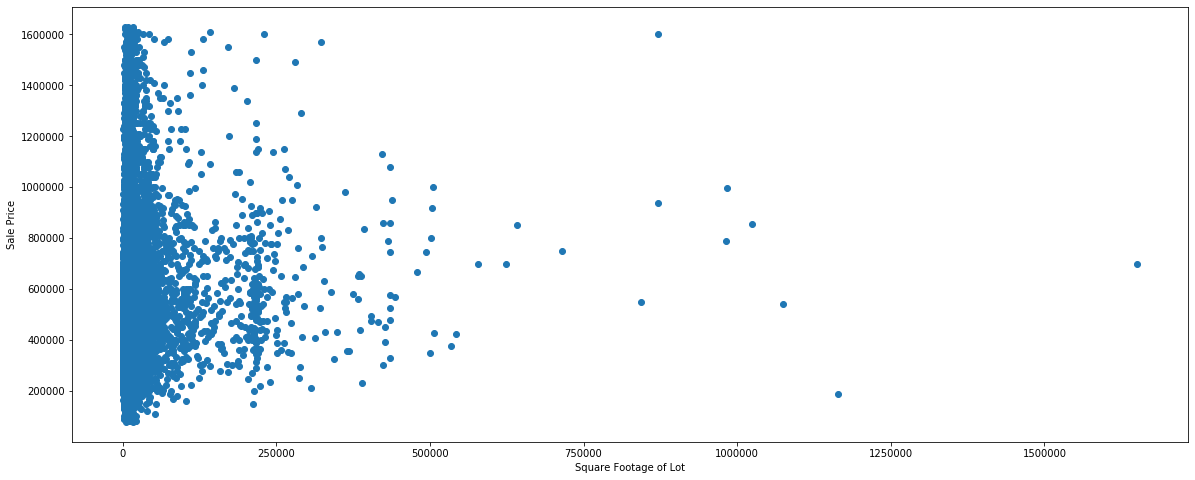

In [49]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['sqft_lot'], df['price'])
ax.set_xlabel('Square Footage of Lot')
ax.set_ylabel('Sale Price')
plt.show()

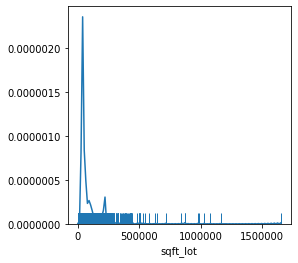

In [50]:
plt.figure(figsize=(4, 4))
sns.distplot(df['sqft_lot'], rug = True, hist = False)

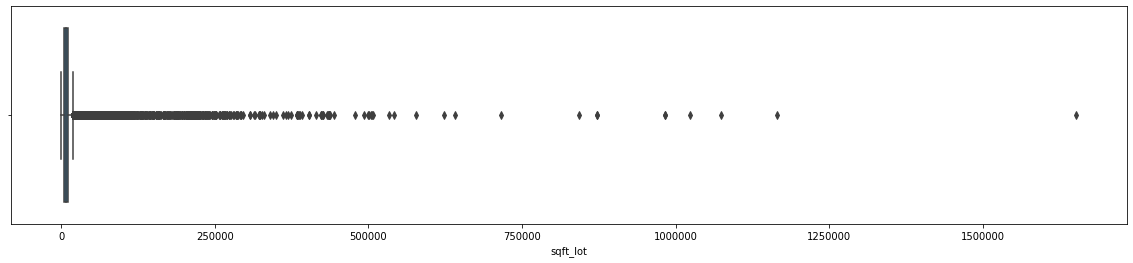

In [52]:
plt.figure(figsize=(20, 4))
sns.boxplot(df['sqft_lot'], orient = "h")

In [53]:
len(df[df['sqft_lot'] >= 10685])

5112

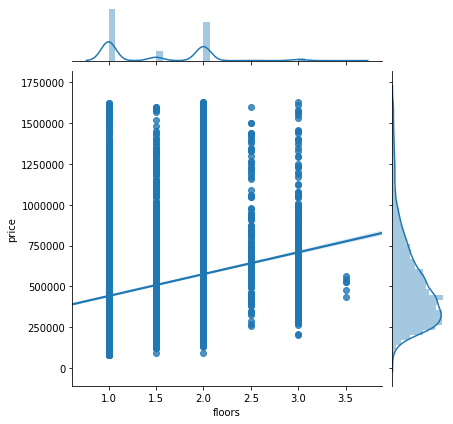

In [101]:
sns.jointplot(df['floors'], 'price', data=df, kind='reg')

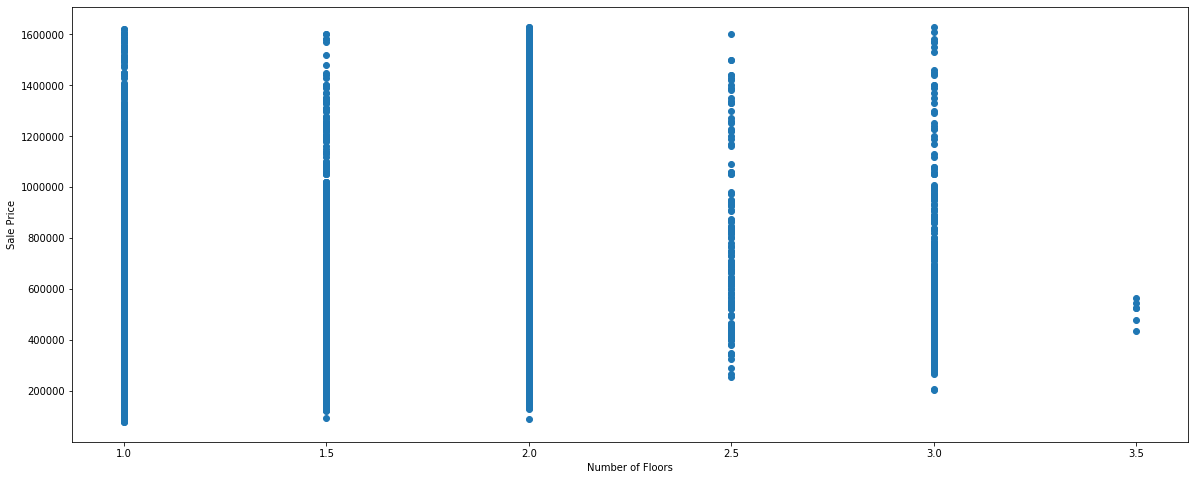

In [54]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['floors'], df['price'])
ax.set_xlabel('Number of Floors')
ax.set_ylabel('Sale Price')
plt.show()

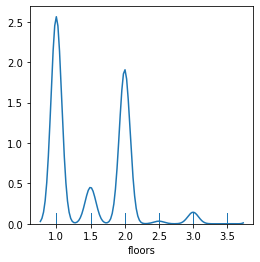

In [55]:
plt.figure(figsize=(4, 4))
sns.distplot(df['floors'], rug = True, hist=False)

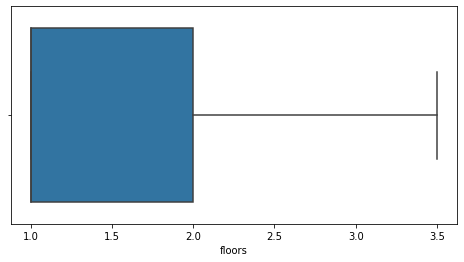

In [56]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['floors'], orient = "h")

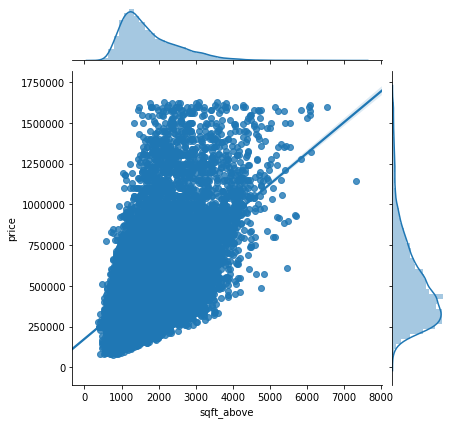

In [102]:
sns.jointplot(df['sqft_above'], 'price', data=df, kind='reg')

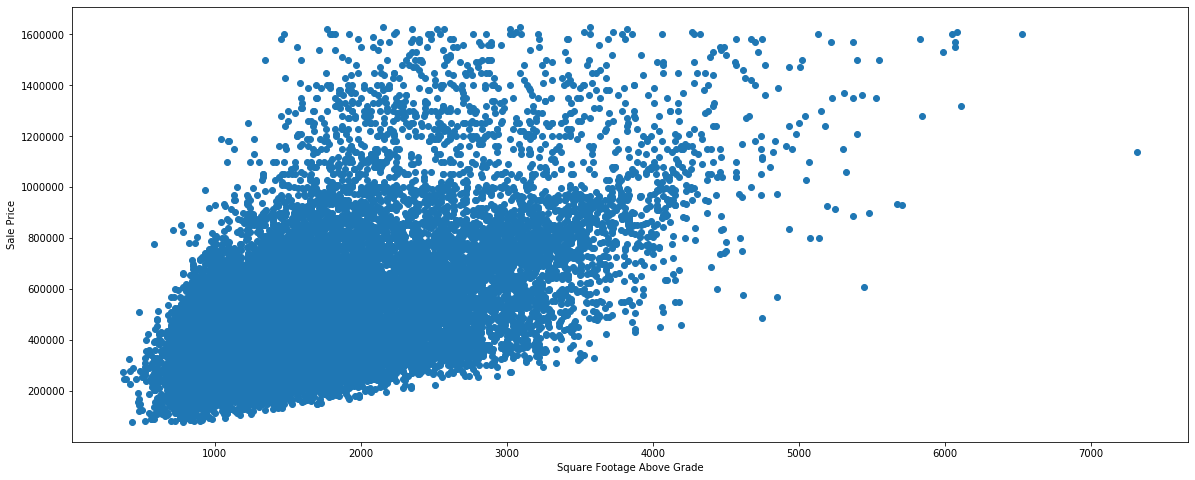

In [57]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['sqft_above'], df['price'])
ax.set_xlabel('Square Footage Above Grade')
ax.set_ylabel('Sale Price')
plt.show()

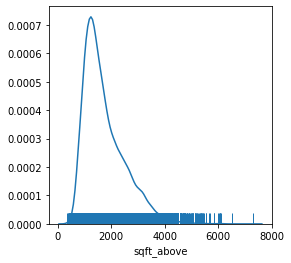

In [58]:
plt.figure(figsize=(4, 4))
sns.distplot(df['sqft_above'], rug = True, hist=False)

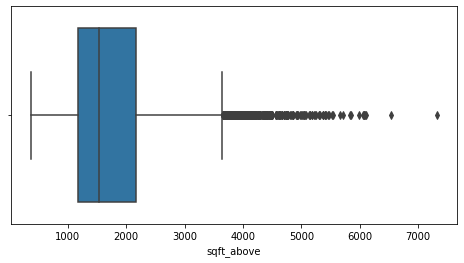

In [59]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['sqft_above'], orient = "h")

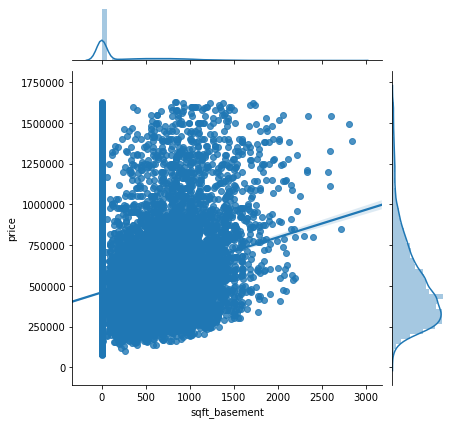

In [103]:
sns.jointplot(df['sqft_basement'], 'price', data=df, kind='reg')

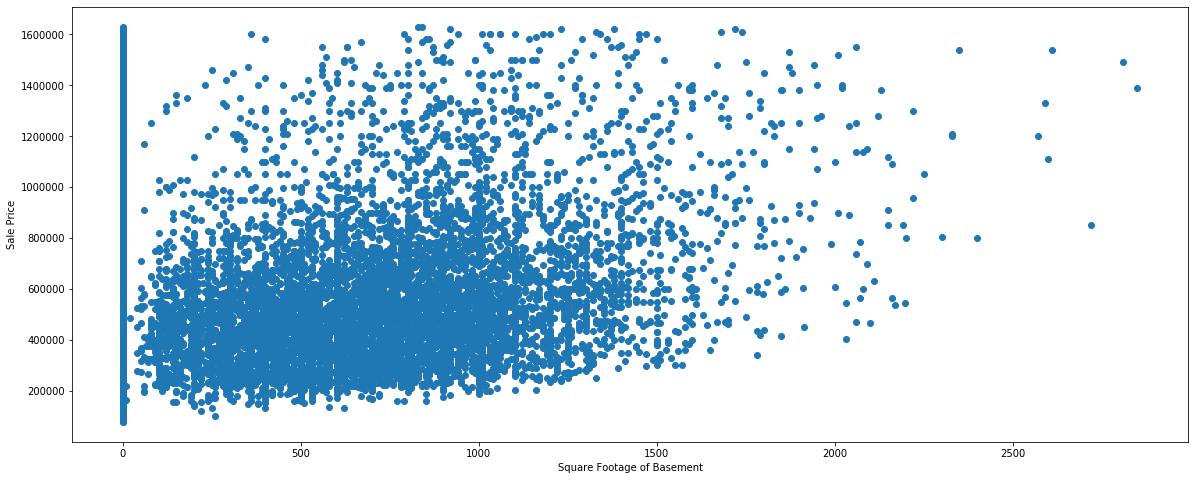

In [60]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['sqft_basement'], df['price'])
ax.set_xlabel('Square Footage of Basement')
ax.set_ylabel('Sale Price')
plt.show()

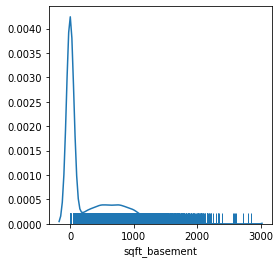

In [61]:
plt.figure(figsize=(4, 4))
sns.distplot(df['sqft_basement'], rug = True, hist=False)

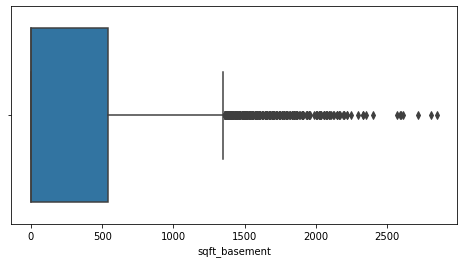

In [62]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['sqft_basement'], orient = "h")

In [63]:
len(df[df['sqft_basement'] >= 1500])

292

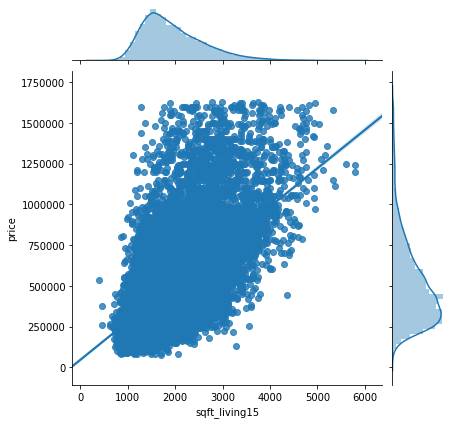

In [104]:
sns.jointplot(df['sqft_living15'], 'price', data=df, kind='reg')

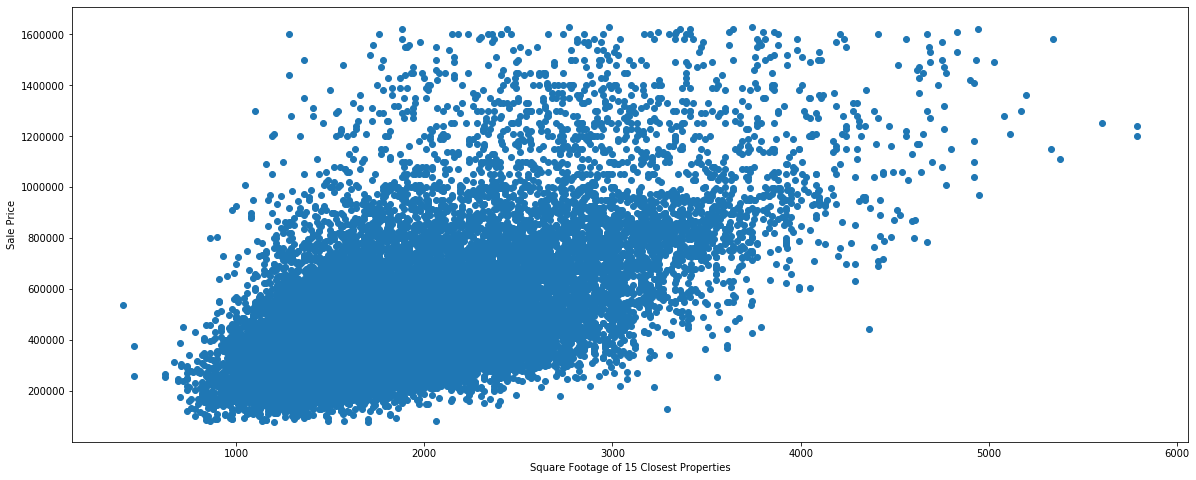

In [64]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['sqft_living15'], df['price'])
ax.set_xlabel('Square Footage of 15 Closest Properties')
ax.set_ylabel('Sale Price')
plt.show()

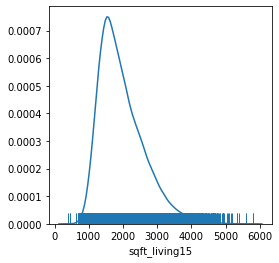

In [65]:
plt.figure(figsize=(4, 4))
sns.distplot(df['sqft_living15'], rug = True, hist=False)

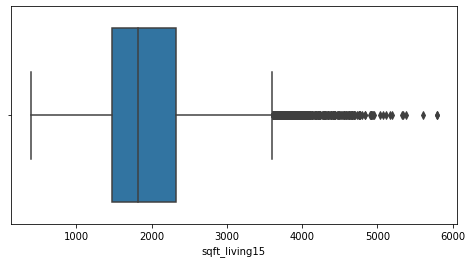

In [66]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['sqft_living15'], orient = "h")

In [67]:
len(df[df['sqft_living15'] >= 3800])

298

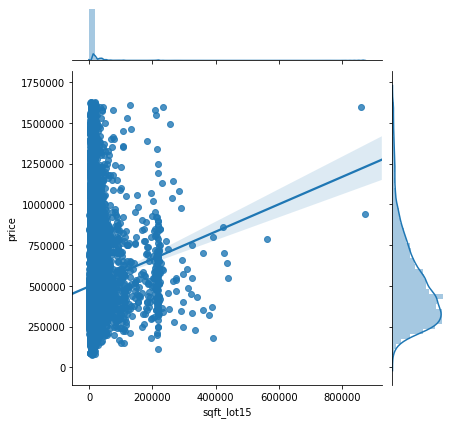

In [105]:
sns.jointplot(df['sqft_lot15'], 'price', data=df, kind='reg')

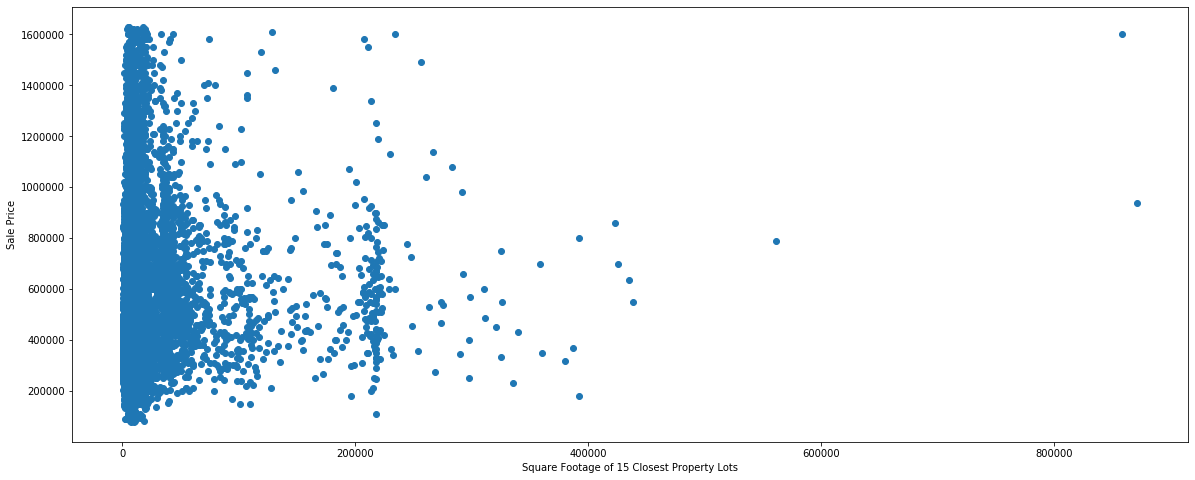

In [68]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['sqft_lot15'], df['price'])
ax.set_xlabel('Square Footage of 15 Closest Property Lots')
ax.set_ylabel('Sale Price')
plt.show()

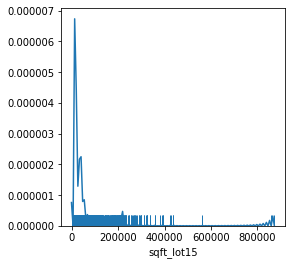

In [69]:
plt.figure(figsize=(4, 4))
sns.distplot(df['sqft_lot15'], rug = True, hist=False)

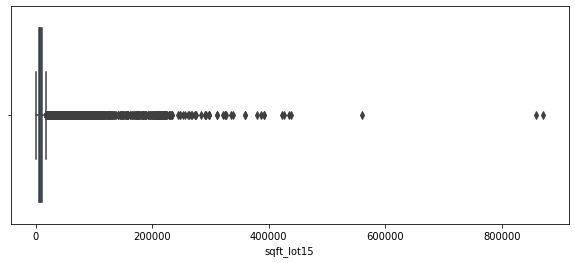

In [71]:
plt.figure(figsize=(10, 4))
sns.boxplot(df['sqft_lot15'], orient = "h")

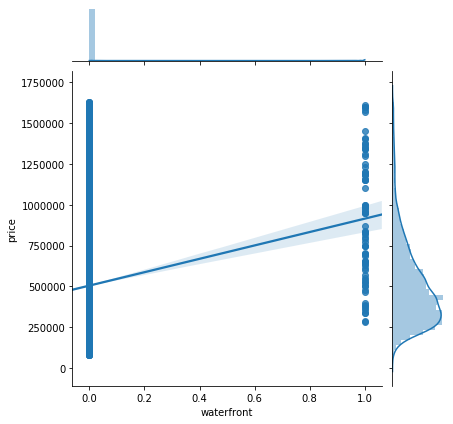

In [106]:
sns.jointplot(df['waterfront'], 'price', data=df, kind='reg')

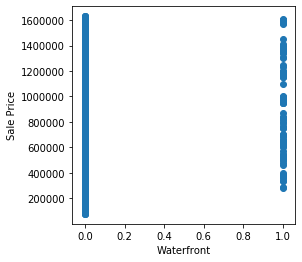

In [84]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['waterfront'], df['price'])
ax.set_xlabel('Waterfront')
ax.set_ylabel('Sale Price')
plt.show()

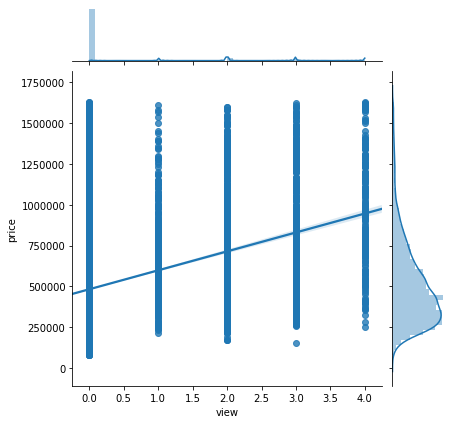

In [107]:
sns.jointplot(df['view'], 'price', data=df, kind='reg')

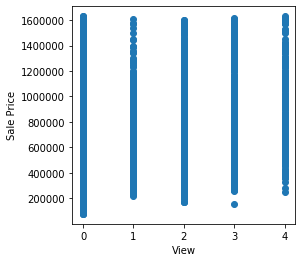

In [85]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['view'], df['price'])
ax.set_xlabel('View')
ax.set_ylabel('Sale Price')
plt.show()

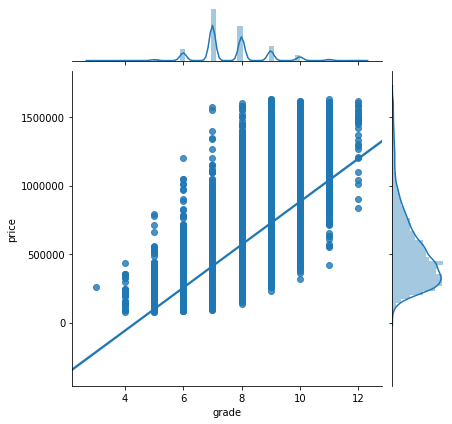

In [108]:
sns.jointplot(df['grade'], 'price', data=df, kind='reg')

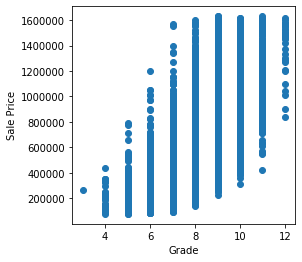

In [86]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['grade'], df['price'])
ax.set_xlabel('Grade')
ax.set_ylabel('Sale Price')
plt.show()

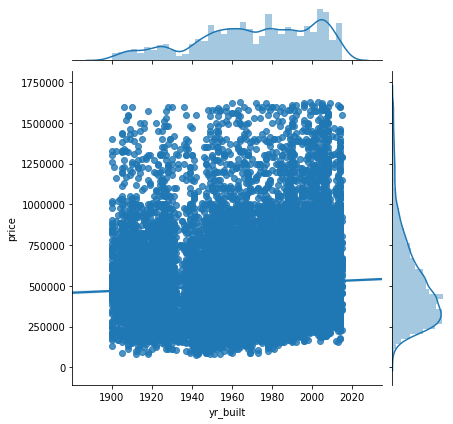

In [109]:
sns.jointplot(df['yr_built'], 'price', data=df, kind='reg')

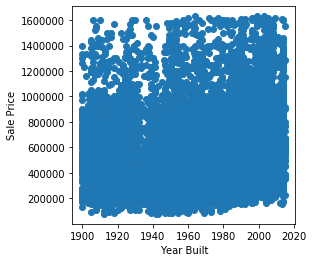

In [87]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['yr_built'], df['price'])
ax.set_xlabel('Year Built')
ax.set_ylabel('Sale Price')
plt.show()

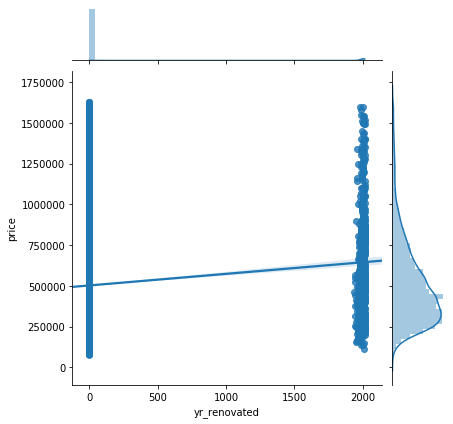

In [110]:
sns.jointplot(df['yr_renovated'], 'price', data=df, kind='reg')

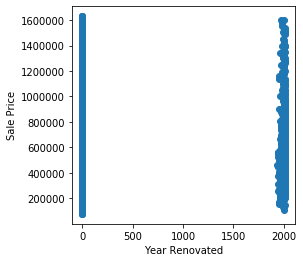

In [83]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['yr_renovated'], df['price'])
ax.set_xlabel('Year Renovated')
ax.set_ylabel('Sale Price')
plt.show()

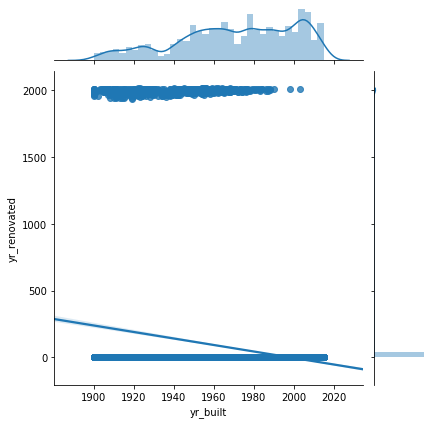

In [111]:
sns.jointplot(df['yr_built'], 'yr_renovated', data=df, kind='reg')

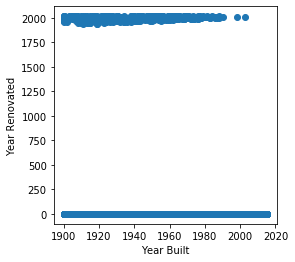

In [88]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['yr_built'], df['yr_renovated'])
ax.set_xlabel('Year Built')
ax.set_ylabel('Year Renovated')
plt.show()

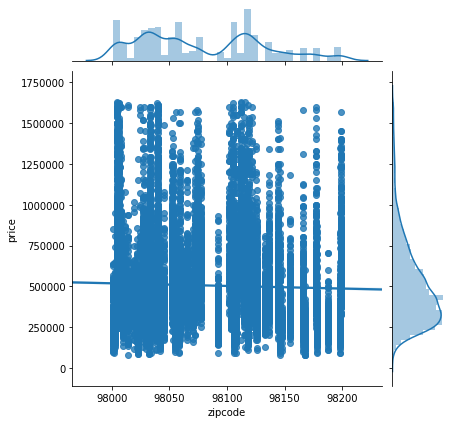

In [112]:
sns.jointplot(df['zipcode'], 'price', data=df, kind='reg')

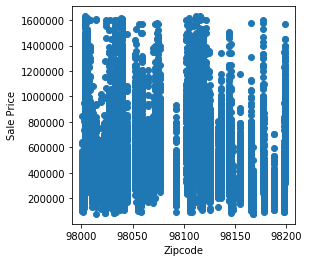

In [89]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['zipcode'], df['price'])
ax.set_xlabel('Zipcode')
ax.set_ylabel('Sale Price')
plt.show()

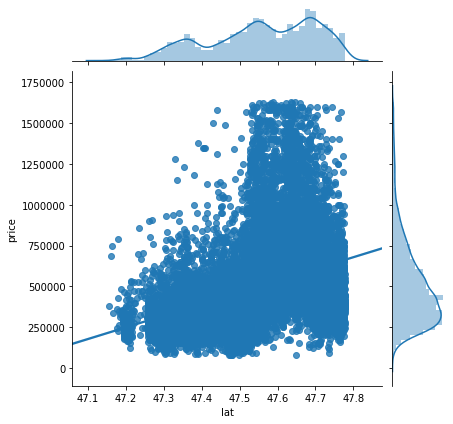

In [113]:
sns.jointplot(df['lat'], 'price', data=df, kind='reg')

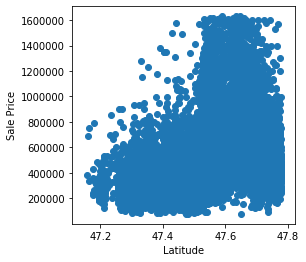

In [90]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['lat'], df['price'])
ax.set_xlabel('Latitude')
ax.set_ylabel('Sale Price')
plt.show()

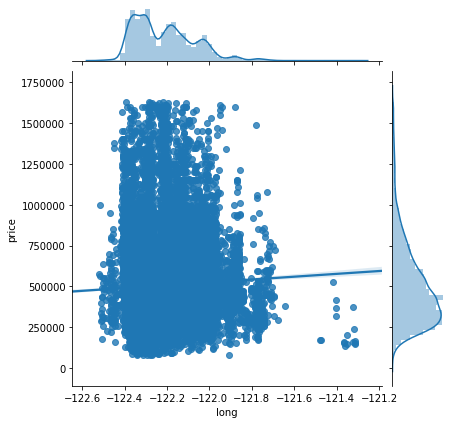

In [114]:
sns.jointplot(df['long'], 'price', data=df, kind='reg')

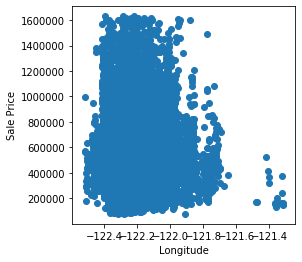

In [91]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['long'], df['price'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Sale Price')
plt.show()

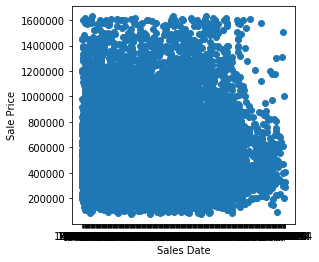

In [92]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['date'], df['price'])
ax.set_xlabel('Sales Date')
ax.set_ylabel('Sale Price')
plt.show()

In [ ]:
# categorical variables: bedrooms, bathrooms, floors, waterfront, view, condition, grade, zipcode
# continuous variables: sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, yr_built, lat, long

In [ ]:
# I've done a whole lot of visualizations in this section because I keep learning different, better
# amd more optimized techniques and I don't want to delete any of my work so that I always have 
# the reference.

# The jointplot makes everything "pretty". It's a combination plot of scatter, histogram,
# a regression line and KDE (kernel density estimate).

# KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density 
# of a continuous variable. It depicts the probability density at different values in a 
# continuous variable.

### Correlations

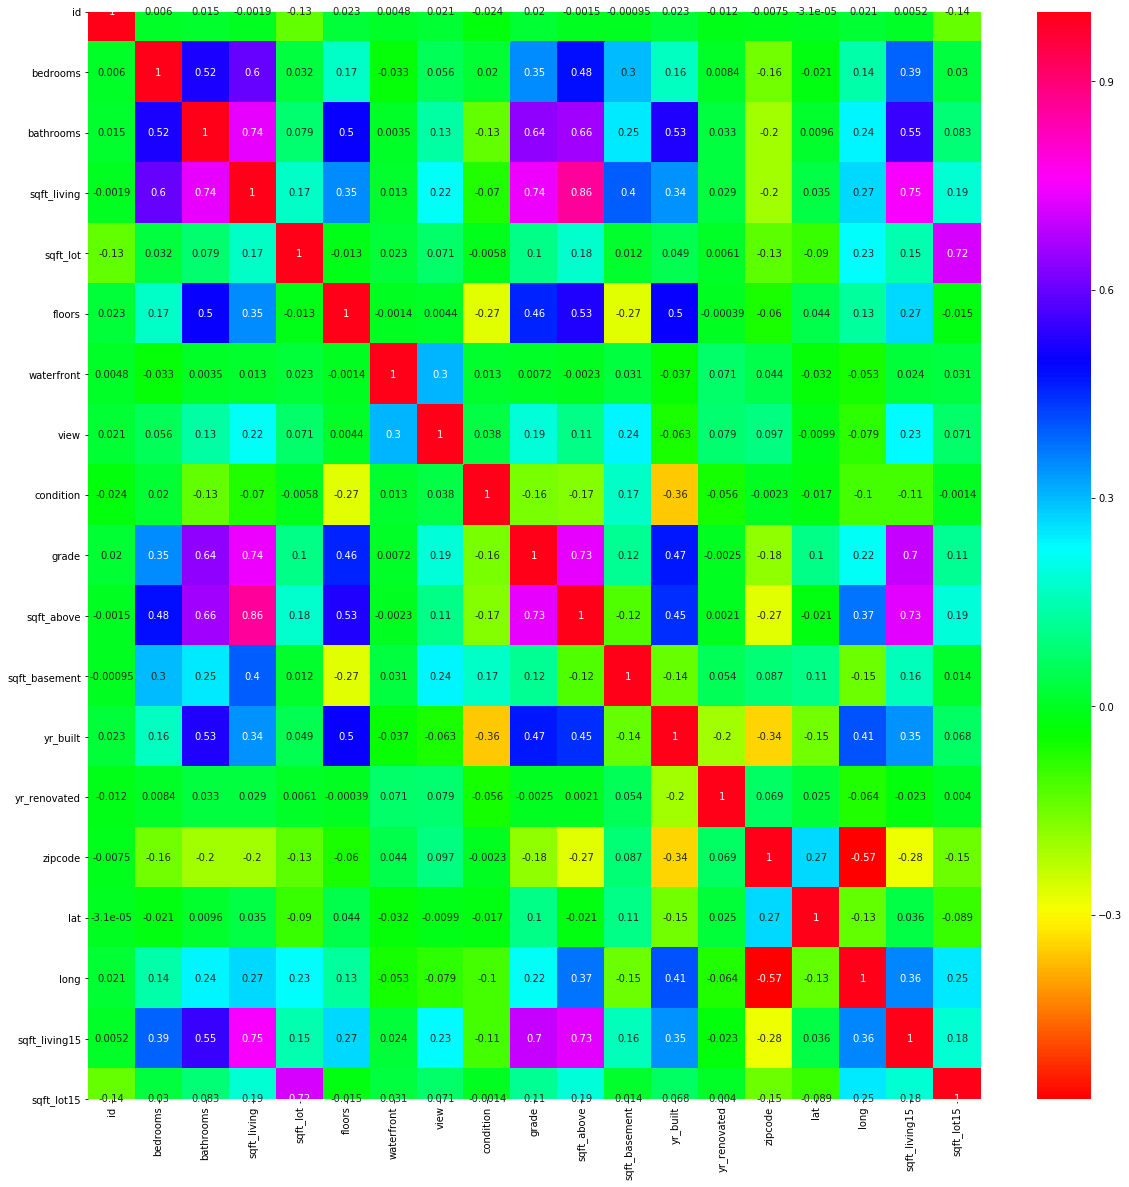

In [136]:
fig, ax = plt.subplots(figsize=(20, 20))
features = df.drop('price', axis=1)
sns.heatmap(features.corr(), cmap = 'hsv', annot = True)
plt.show()

In [119]:
abs(features.corr()) > 0.8

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
# looping through all the columns. Needs optimization.

for column in df.columns[3:]:  # Loop over all columns
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style="ticks")
    sns.boxplot(y=column, data=df)  # column is chosen here
    sns.despine(offset=10, trim=True) 
    fig.set_size_inches(22,14)

In [ ]:
# identifying outliers using the interquartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
Q3